In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from numpy import loadtxt
from numpy import sort
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from xgboost import XGBRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import bokeh
import sklearn
import xgboost as xgb
import numpy as np
from scipy.stats import norm
import pandas as pd
import matplotlib.mlab as mlab
import sqlite3
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from numpy import loadtxt
from numpy import sort
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from xgboost import XGBRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import bokeh
import sklearn
import xgboost as xgb
import numpy as np
from scipy.stats import norm
import pandas as pd
import matplotlib.mlab as mlab
import sqlite3
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

#import packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import time 
import datetime
import collections
# from plotnine import *
import seaborn as sns
import scipy.stats as stats

from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge 
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import pandas as pd


import xgboost as xgb
import lightgbm as lgb

In [4]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd


import xgboost as xgb
import lightgbm as lgb

In [5]:
zillow = pd.read_csv('/content/drive/MyDrive/SWE project/DataStorage/datawithLessVIF.csv')

In [6]:
zillow.shape

(69047, 25)

From last step of feature selection,we know the importance of each feature to the target variable(Logerror) .But this is only a reference,as user could not enter all the feature when they buy a house and it is impractical .And we need to select the feature that is close to real-life cirsumtance in these feature list.

From the feature list,we could classify into differrnt cases:


Room proeprty:

Taxamount:

Outer property

And it is very not user-friendly to choose feature like airconditioningId ,etc.



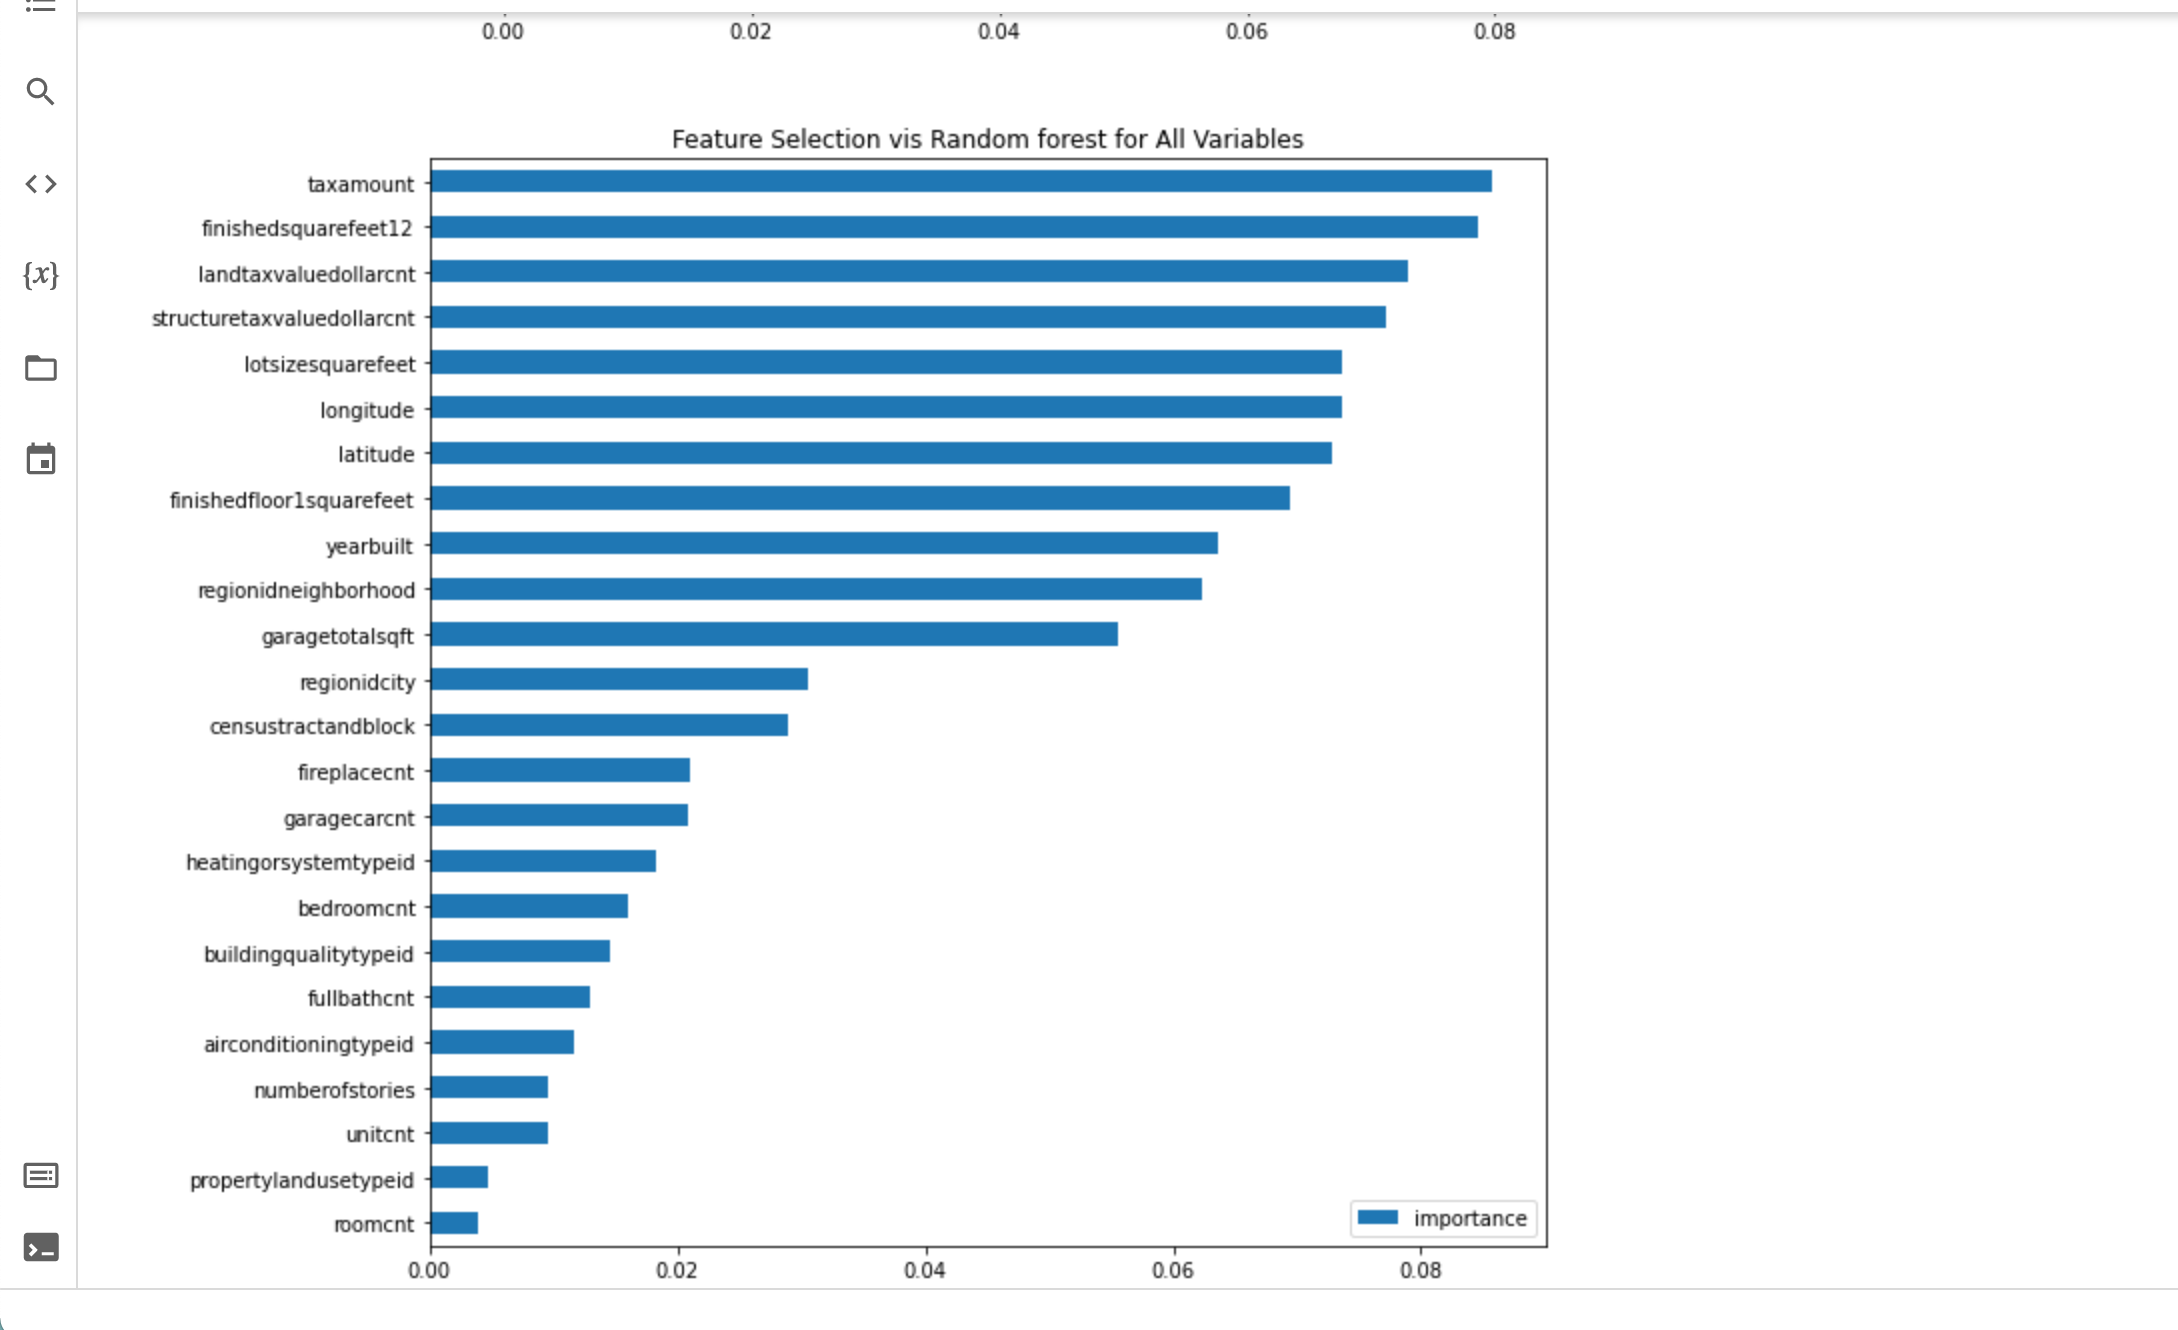

In [10]:
zillow.describe()

,airconditioningtypeid,bedroomcnt,buildingqualitytypeid,finishedfloor1squarefeet,finishedsquarefeet12,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,...,regionidneighborhood,roomcnt,unitcnt,yearbuilt,numberofstories,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror
count,69047.000000,69047.000000,69047.000000,69047.000000,69047.000000,69047.000000,69047.000000,69047.000000,69047.000000,69047.000000,...,69047.000000,69047.000000,69047.000000,69047.000000,69047.000000,69047.000000,69047.000000,69047.000000,69047.000000,69047.000000
mean,1.696247,2.964271,5.175033,14.939925,15.306043,1.276752,1.601509,1.166044,8.006560,2.389197,...,44.938606,1.094414,1.301150,1969.018342,1.335986,40.666910,43.208437,19.748111,1897.748111,0.005841
std,0.762928,0.955464,1.591258,0.271068,1.511379,0.039729,0.249260,0.129826,3.197667,0.874577,...,7.204968,2.466587,0.172682,23.123542,0.079212,5.997614,8.959318,3.109927,0.283949,0.064625
min,1.214766,0.000000,1.000000,13.319682,10.479807,1.214766,1.214766,0.738244,0.000000,1.214766,...,25.382875,0.000000,1.214766,1899.000000,1.214766,21.236801,15.334501,9.796348,1897.546160,-0.239500
25%,1.214766,2.000000,4.000000,14.778150,14.256708,1.241604,1.574588,1.159589,6.958907,1.574588,...,40.436788,0.000000,1.214766,1953.000000,1.319344,36.761919,36.783719,17.804711,1897.554671,-0.024300
50%,1.214766,3.000000,4.600000,14.934473,15.161099,1.267968,1.574588,1.187435,8.538570,2.522070,...,47.402055,0.000000,1.214766,1970.000000,1.319344,40.475664,44.189360,19.770675,1897.559777,0.005000
75%,2.383482,4.000000,7.000000,15.089678,16.249657,1.293875,1.866806,1.214766,10.116111,3.044710,...,48.749297,0.000000,1.214766,1987.000000,1.344390,44.414020,49.483759,21.644827,1898.167875,0.034400
max,3.489764,6.000000,10.000000,16.541323,20.357453,1.463786,2.330233,1.574588,13.265566,4.431160,...,58.184061,9.000000,1.986983,2015.000000,1.637483,61.193797,71.559699,30.212832,1898.506835,0.259300


In [13]:
X = zillow[[
  'taxamount','finishedsquarefeet12','bedroomcnt','yearbuilt'
]]

In [14]:
X.head()

,taxamount,finishedsquarefeet12,bedroomcnt,yearbuilt
0,21.634965,15.608954,3,1959.0
1,23.706126,16.763421,4,2014.0
2,24.359353,16.681180,2,1940.0
3,18.056992,13.120436,2,1987.0
4,20.659194,16.798752,4,1981.0


In [15]:
y = zillow['logerror']

Linear regression

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error

In [27]:
mSE = mean_squared_error(y_test, y_pred) 

Mean square error of our model on test dataset is relative low via compare other results on kaggle 

In [28]:
mSE

0.004099985307764925

In [ ]:
print("Training Set : Mean Absolute Error = {}".format(mean_absolute_error(ytrainpred, y_train)))
print("Testing Set : Mean Absolute Error = {}".format(mean_absolute_error(ytestpred, y_test)))

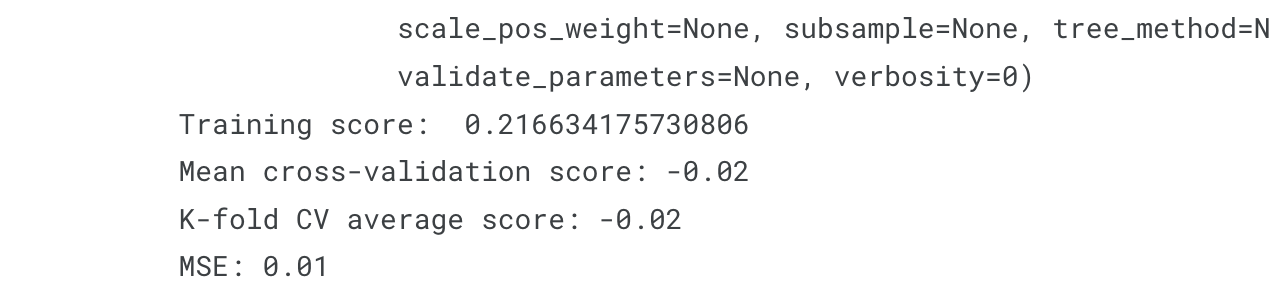

R square of our model 

Since the original data of zillow is very desne ,we could this graph from one of soultion 

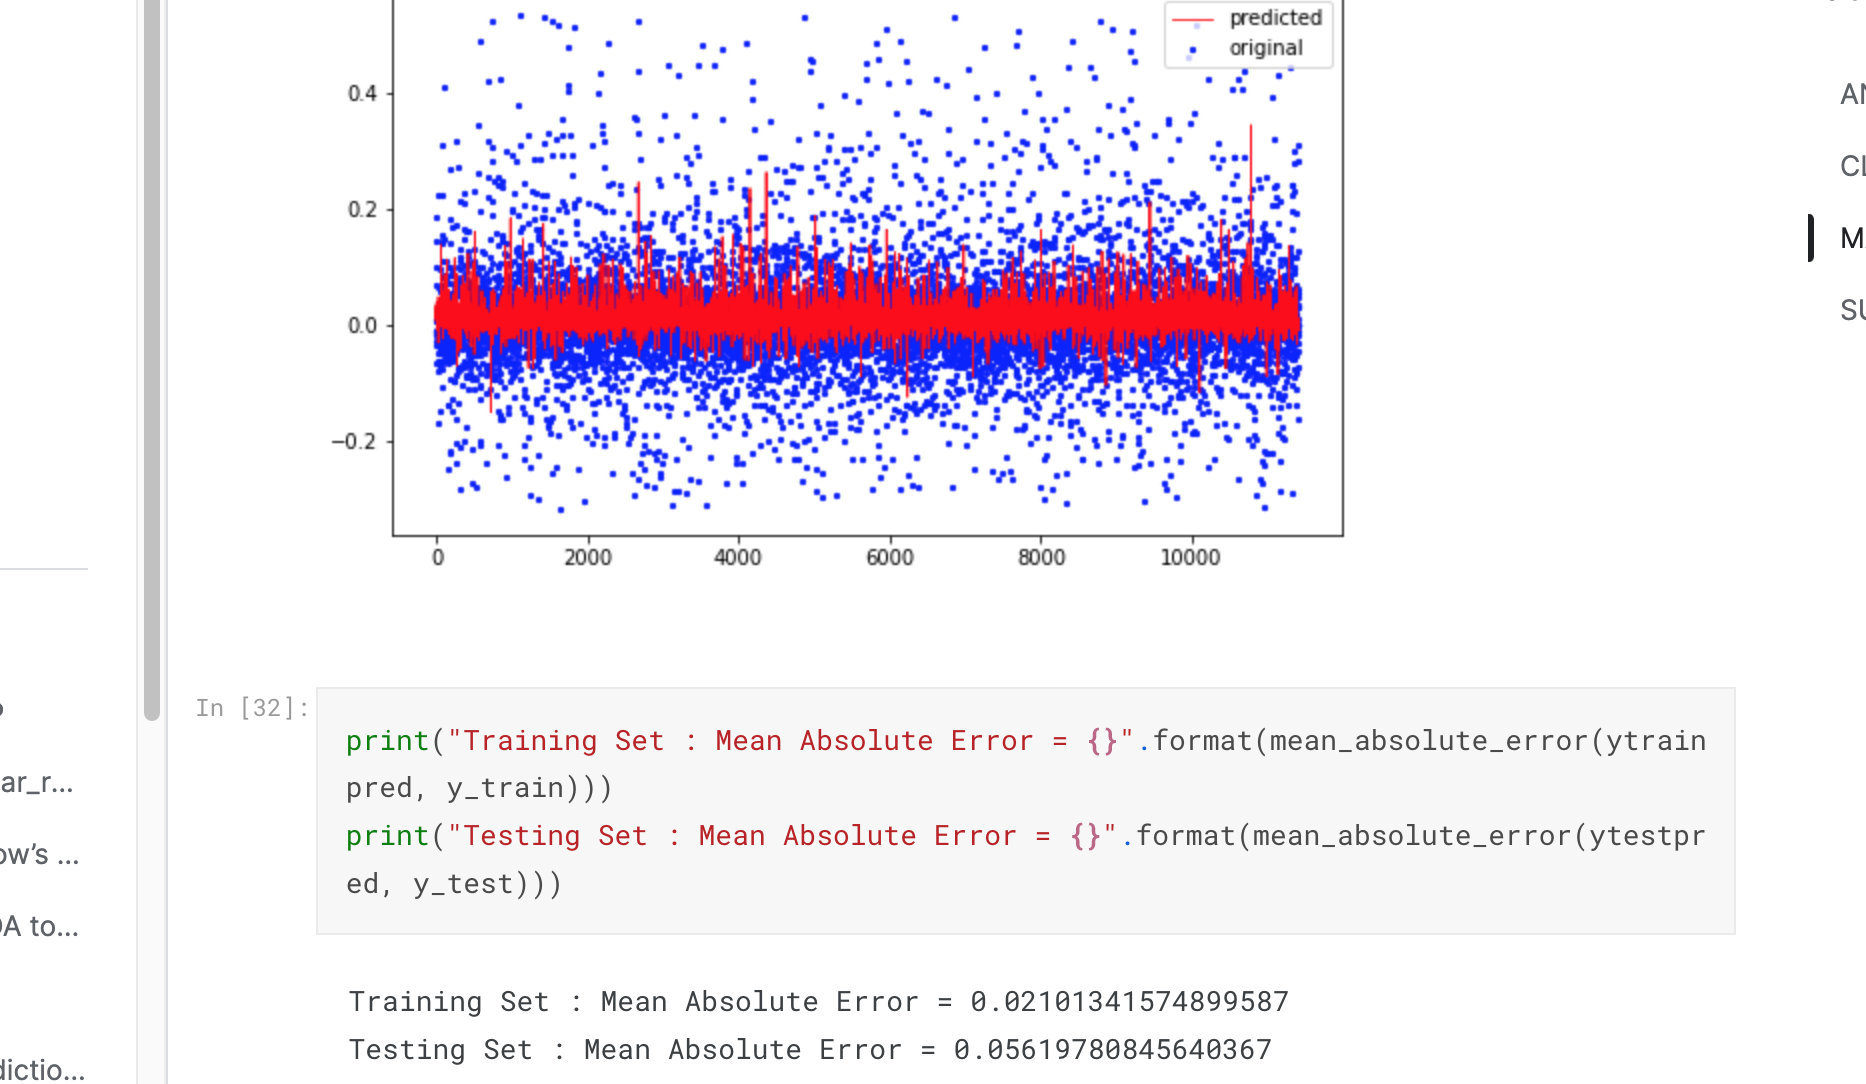

So the r square of this mode is not 100 % fit ,

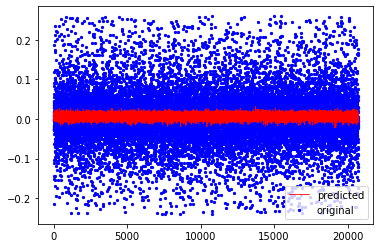

In [33]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

And our square of this model is 

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score


In [35]:
r2_score(y_test,y_pred)

0.005488105872623383

In [36]:
print('R2:',reg.score(X_test,y_test))

R2: 0.005488105872623383


Visulization of results

Q-Q plot of predict log error

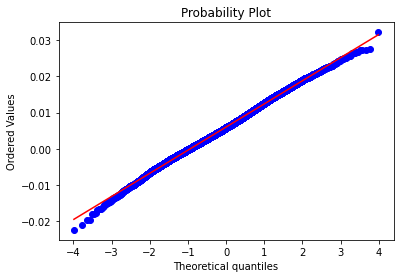

In [29]:
import numpy as np 
import pylab 
import scipy.stats as stats
 # Graph for predict log error
stats.probplot(y_pred, dist="norm", plot=pylab)
pylab.show()

The Q-Q plot for actual value(y _test)

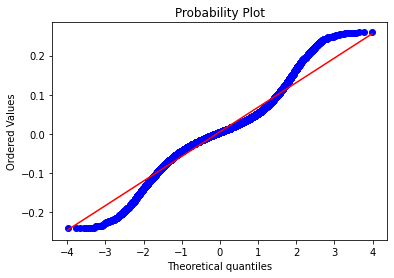

In [30]:
import numpy as np 
import pylab 
import scipy.stats as stats
 # Graph for predict log error
stats.probplot(y_test, dist="norm", plot=pylab)
pylab.show()

Normal distrubtion of Actual value 

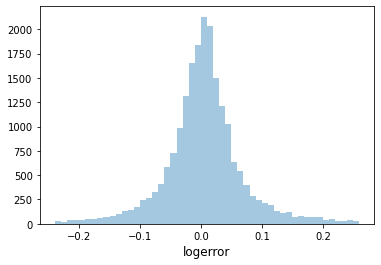

In [31]:
sns.distplot(y_test, bins=50, kde=False)
plt.xlabel('logerror', fontsize=12)
plt.show()

Normal distribution of predict log error

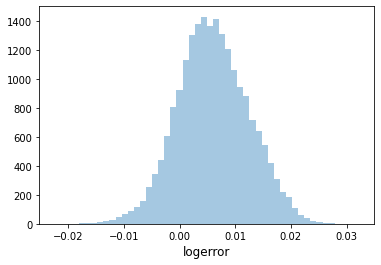

In [32]:
sns.distplot(y_pred, bins=50, kde=False)
plt.xlabel('logerror', fontsize=12)
plt.show()

Distribution of y_test actual value

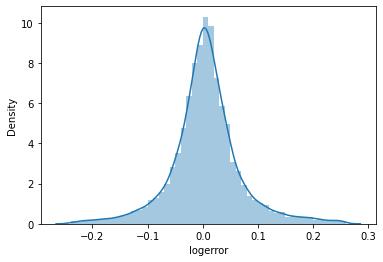

In [37]:
#traget variable
sns.distplot(y_test)
plt.show()

Distribution of y predict  value

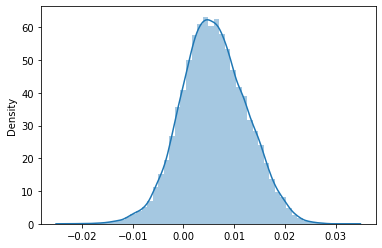

In [38]:
#traget variable
sns.distplot(y_pred)
plt.show()

Model stroarge

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle
import requests
import json

In [40]:
pickle.dump(reg, open('linearRegression.pkl','wb'))

Model save